# Práctica Nro. 5

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/manuxch/calculo_avanzado/blob/main/laplace/clase_05/code/practica_05.ipynb)

En esta práctica se utiliza el módulo sympy para el cálculo simbólico y operaciones de cálculo diferencial e integral. Se puede obtener ayuda en:
- [Evaluación numérica](https://docs.sympy.org/latest/modules/evalf.html)
- [Cálculo diferencial e integral](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html)
- [Integrales (de Laplace)](https://docs.sympy.org/latest/modules/integrals/integrals.html)

In [26]:
import math
import matplotlib.pyplot as plt
plt.style.use('../../../utils/clases.mplstyle') # Borrar esta línea para correr en Colab
import numpy as np
import sympy as sym
from sympy import (DiracDelta, exp, cos, sin, laplace_transform, Heaviside, 
                   symbols, Function, inverse_laplace_transform, Eq)
from sympy.abc import t, s, a
sym.init_printing()

## Ejercicio 1

La integral de la transformada de Laplace se puede obtener de alguna tabla, lo que resulta en:
\begin{align}
\mathscr{L}(f)(s) &= \int_0^{\infty} e^{-st} \cos at \, dt   \\
&= \lim_{M \rightarrow \infty} \int_0^{M} e^{-st} \cos at \, dt   \\
&= \lim_{M \rightarrow \infty} \left. \frac{e^{-st} (a \sin at - s \cos at)}{s^2 + a^2} \right|_0^M
&= \frac{s}{s^2 + a^2}
\end{align}

Alternativamente, podemos resolverlo de otro modo recordando de la teoría que

$$ \mathscr{L}[e^{at}](s) = \frac{1}{s - a} $$

Si reemplazamos $a$ por $a i$ tenemos:
\begin{align}
\mathscr{L}[e^{ait}](s) &= \mathscr{L}[\cos at + i \sin at](s) \\
&= \mathscr{L}[\cos at](s) + i \mathscr{L}[\sin at](s) \tag{1.1}\\
&= \frac{1}{s - a i} = \frac{1}{s - a i} \frac{s + ai}{s + ai} = \frac{s + a i}{s^2 + a^2} \\
&= \frac{s}{s^2 + a^2} + i \frac{a}{s^2 + a^2} \tag{1.2}
\end{align}

Igualando las partes real e imaginarias de (1.1) y (1.2), obtenemos:
$$ \mathscr{L}[\cos at](s) = \frac{s}{s^2 + a^2}, \quad \mathscr{L}[\sin at](s) = \frac{a}{s^2 + a^2} $$

Ahora vamos a resolverlo utilizando los recursos de cálculo simbólico que provee SymPy. 

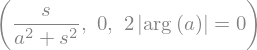

In [3]:
f = cos(a*t)
laplace_transform(f, t, s)

La función `laplace_transfrom()` devuelve una tupla en la que el primer elemento es la transformada $F(s) = \mathscr{L}(f)$, el segundo es el semiplano de convergencia (esto es $a > 0$) y el tercer elemento son condiciones de convergencia auxiliares (en este caso, $\arg(a) = 0$ significa que el argumento del número complejo $a$ es nulo, lo que es lo mismo que decir que $a$ es un número real). Si solo queremos obtener $F(s)$ podemos especificar `noconds=True`:

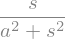

In [4]:
laplace_transform(f, t, s, noconds=True)

## Ejercicio 2

Hemos visto que 
$$ \mathscr{L}(t^n) = \frac{n!}{s^{n + 1}} \tag{2.1} $$ 
es válida para $n = 0$, ya que en ese caso, como vimos en la teoría y considerando que $0! = 1$:
$$ \mathscr{L}(t^0) = \mathscr{L}(1) = \frac{1}{s} $$

Entonces proponemos la hipótesis de inducción y asumimos que (2.1) vale para algún entero $n \geq 0$, y probaremos que vale entonces para $n + 1$. Integrando por partes (2.1) tenemos
\begin{align}
\mathscr{L}(t^{n + 1}) &= \int_0^{\infty} e^{-st} t^{n+1} \, dt \\
&= \left. -\frac{1}{s} e^{-st} t^{n+1} \right|_0^{\infty} + \frac{n + 1}{s} \int_0^{\infty} e^{-st} t^n \, dt
\end{align}
En la última expresión, la parte sin integral es nula al evaluarla en los límites, mientras que el segundo término es $(n + 1)/s$ veces $\mathscr{L}(t^n)$. De aquí, y por la hipótesis de inducción:
$$ \mathscr{L}(t^{n + 1}) = \frac{n + 1}{s} \mathscr{L}(t^{n}) = \frac{n + 1}{s}  \frac{n!}{s^{n + 1}} = \frac{(n + 1)!}{s^{n + 2}} $$
Esto prueba la fórmula (2.1).

## Ejercicio 3

Para hallar la transformada de $H(t-a)$ utilizamos directamente la definición:
\begin{align}
\mathscr{L}[H(t-a)](s) &= \int_0^{\infty} e^{-st} H(t-a) \, dt \\
&= \int_0^{\infty} e^{-st} 1 \, dt = \left. -\frac{e^{-st}}{s} \right|_{t = a}^{\infty}
\end{align}

En la última expresión, el límite inferior de integración es $t = a$ dado que por la definición de $H(t-a)$, esta función es nula para $t < a$.Por lo tanto:
$$ \mathscr{L}`H(t - a)](s) = \frac{e^{-as}}{s} $$

SymPy tiene definida la función Heaviside, con la particularidad de que $H(0) = 1/2$, aunque esto puede ser redefinido en la misma función utilizando como argumento `H0`. 

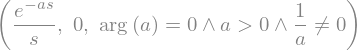

In [6]:
laplace_transform(Heaviside(t - a), t, s)

Obtenemos el mismo resultado anterior para $F(s)$, con la condición de convergencia $a > 0$, y por las condiciones suplementarias de convergencia vemos que $a$ debe ser un número real positivo distinto de cero.

## Ejercicio 4

In [22]:
s, t = symbols('s t')
y = Function('y')(t)
Y = laplace_transform(y, t, s)
Y

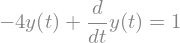

In [27]:
ec_dif = Eq(y.diff(t, 1) - 4 * y,  1)
ec_dif

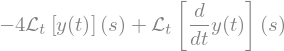

In [30]:
laplace_transform(ec_dif.lhs, t, s).doit()